# **Bellabeat Case Study**

# PHASE 1: Ask

## Key Objectives:
1. Identify the key stakeholders
* The key stakeholders are Urška Sršen and Sando Mur, who are key members of the Bellabeat executive team. The secondary stakeholders are the Bellabeat marketing analytics team.

2. Identify the business task
* Analyze smart device usage data to identify trends to assist with Bellabeat's marketing strategy

3. Identify the deliverables
* Description of all data sources used
* Documentation of any cleaning/manipulation of data
* Summary of analysis
* Supporting visualizations and key findings
* High-level insights

# PHASE 2: Prepare

1. Identify the Data Source: 

__Dataset__: FitBit Fitness Tracker Data from [Mobius](https://www.kaggle.com/datasets/arashnic/fitbit) 
- 30 users who consented to the submission of personal tracker data
- 18 CSV
- Data generated from 3-12-2016 to 5-12-2016

2. Determine the credibility of the data set
I will utilize a ROCCC approach.
*__Reliability__: LOW- The data is not very reliable due to having a small sample set of only 30 participants.

*__Original__: LOW - Generated by outside party (Amazon Mechnical Turk)

*__Comprehensive__: LOW - Does provide datasets related to Bellabeat's products but lacks information about personal
characteristics

*__Current__: LOW - Not current for 2022

*__Cited__: LOW - Unknown

This data set is not recommended to be used to produce high-level insights and should mainly be used for understanding the initial picture of Bellabeat.

# PHASE 3: Process

__NOTE__: I will be using R for everything.
### Load the packages

In [1]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(readr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Import the data sets

In [2]:
dailyActivity <- read_csv("/kaggle/input/bellabeat-information/dailyActivity_merged.csv")
sleepDay <- read_csv("/kaggle/input/bellabeat-information/sleepDay_merged.csv")
weightInfo <- read_csv("/kaggle/input/bellabeat-info2/weightLogInfo_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 67 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (6): Id, WeightKg, WeightPounds, Fat, BMI, LogId
lgl (1): IsManualReport

ℹ Use `spec()` to retrieve the full column specification fo

### Preview the data

In [3]:
# preview the datasets
head(dailyActivity)

# check number of unique IDs
n_distinct(dailyActivity$Id)
n_distinct(sleepDay$Id)
n_distinct(weightInfo$Id)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


[1] 33

[1] 24

[1] 8

There are 33 participants in the activity data set, 24 participants in the sleep data set, and 8 participants in the weight data set. Due to 8 being too small of a sample size, I had decided not to include it in my analysis.

In [4]:
# check for NA values and remove any duplicates for activity and sleep data set
sum(is.na(dailyActivity))
sum(duplicated(dailyActivity))
dailyActivity <- dailyActivity[!duplicated(dailyActivity),]

[1] 0

[1] 0

# PHASE 4: Analyze

### Summary of Data

In [5]:
#summary of active minutes activity
dailyActivity %>% 
  select(TotalSteps, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories) %>%
  summary()

   TotalSteps    VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :    0   Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.: 3790   1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median : 7406   Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 7638   Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.:10727   3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :36019   Max.   :210.00    Max.   :143.00      Max.   :518.0       
 SedentaryMinutes    Calories   
 Min.   :   0.0   Min.   :   0  
 1st Qu.: 729.8   1st Qu.:1828  
 Median :1057.5   Median :2134  
 Mean   : 991.2   Mean   :2304  
 3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :1440.0   Max.   :4900  

Observations:
- Average sedentary minutes is quite high at 992.3 minutes or ~16.5 hours.
- Average total steps is 7,646.
- Majority of participants are lightly active.
- Average calories burnt is 2,306.

Insights
- Participants are mostly inactive and are not likely to participate in intense activity.

Questions
- Does their activity depend on the day or time of day?

In [6]:
#summary of sleep data set
sleepDay %>% 
  select(TotalMinutesAsleep, TotalTimeInBed) %>% 
  summary()

 TotalMinutesAsleep TotalTimeInBed 
 Min.   : 58.0      Min.   : 61.0  
 1st Qu.:361.0      1st Qu.:403.0  
 Median :433.0      Median :463.0  
 Mean   :419.5      Mean   :458.6  
 3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :796.0      Max.   :961.0  

Observations:
- Average time asleep is 419.5 minutes or ~7 hours.
- Average time in bed is 458 minutes or ~7.6 hours.

Insights:
- Participants get enough sleep on average.

### Merging and creating new columns

In [7]:
# convert dates to weekdays
dailyActivity <- dailyActivity %>% 
  mutate(Weekday = weekdays(as.Date(ActivityDate, "%m/%d/%Y")))

# add a column for sum of activity minutes
activeMinutes<-rowSums(dailyActivity[,c('VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes')])

# add a ratio of ActiveMin/SedentaryMin rounded to 3 points
dailyActivity <- dailyActivity %>% 
  mutate(ratio = activeMinutes/SedentaryMinutes)
dailyActivity$ratio_rounded <- round(dailyActivity$ratio, digit = 3)

# run into issues of inf
summary(dailyActivity$ratio_rounded)

# change inf to na values
dailyActivity <- do.call(data.frame,
                         lapply(dailyActivity,
                                function(x) replace(x, is.infinite(x), NA)))
                                
# drop one value of NA
dailyActivity <- na.omit(dailyActivity)

# summary of active minutes/sedentary minutes
summary(dailyActivity$ratio_rounded)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1415  0.2725     Inf  0.3690     Inf 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1410  0.2720  0.2774  0.3690  2.0000 

Observations:
- Average ratio of active minutes to sedentary minutes is 0.272.
- Majority of participants appear to lie between 0.141 and 0.369 for this ratio.

Insights:
- Participants do engage in some activities but mainly are sedentary.

__Comment__: I should have checked for values of 0 before beginning to eliminate these rows to avoid the issues of INF and to avoid the skewing of my data.

In [8]:
# create new column for merging
dailyActivity$date <- as.Date(dailyActivity$ActivityDate, format='%m/%d/%Y')
sleepDay$date <- as.Date(sleepDay$SleepDay, format="%m/%d/%Y")

# create merged data for activity and sleep
merged_data <- merge(sleepDay, dailyActivity, by=c('Id', 'date'))

# PHASE 5: Share

### Visualization

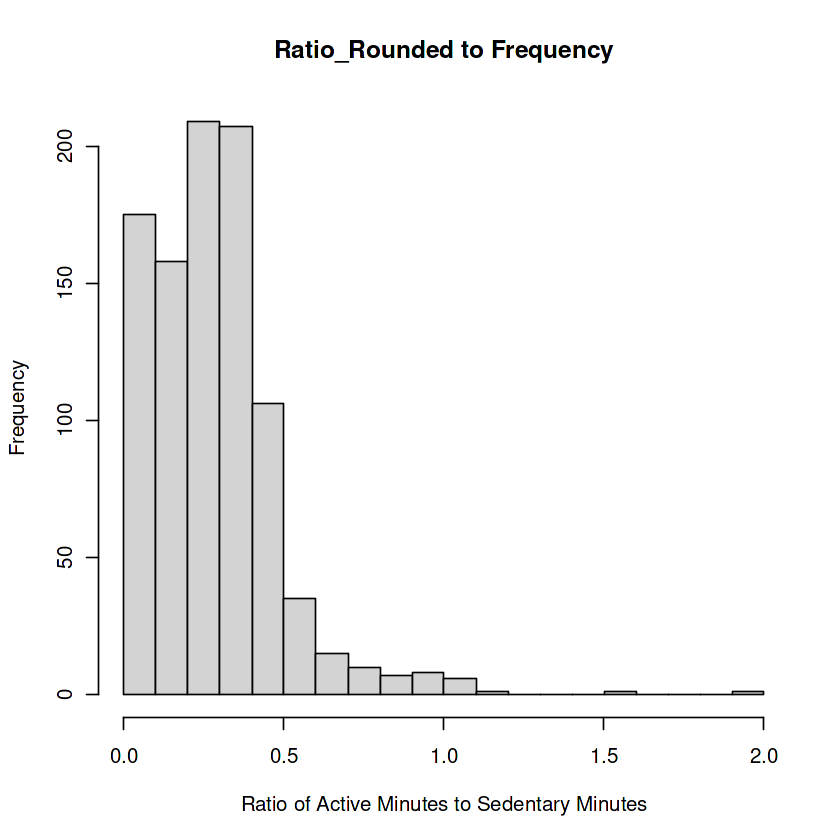

In [9]:
#histogram for ratio_rounded
hist(dailyActivity$ratio_rounded, 
     xlab = 'Ratio of Active Minutes to Sedentary Minutes',
     breaks = c(0.0, seq(0.1, 2.0, 0.1)),
     main = 'Ratio_Rounded to Frequency')

For this histogram, I wanted to visually see the ratio of active minutes to sedentary minutes (also called ratio_rounded) by the frequency of the users. There are a lot of users near 0 for ratio, and this is mainly due to a lot of users having 0 as a value for their active minutes. I did not notice this when I first sorted the data sets, and I would redo this section for my second version.

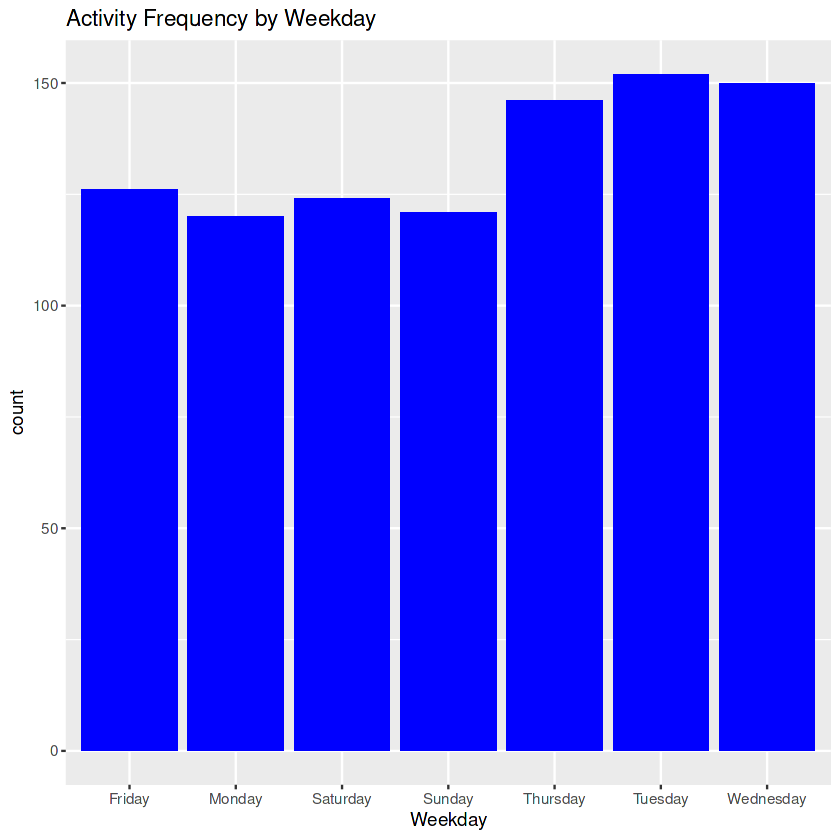

In [10]:
# barchart for days of activity
ggplot(dailyActivity)+
geom_bar(mapping=aes(x=Weekday), fill = 'blue') +
  labs(title = 'Activity Frequency by Weekday')

This barchart looks at the weekdays for which activity was recorded.
- Majority of users are most active on Tuesday, Wednesday, and Thursday.
    - This could be a result of these days being the busiest, people having more free time to possibly exercise, etc. This could be good to analyze further to see why the other days do not have as much activity and if Bellabeat could send additional reminders on the other days to ensure people exercise more.

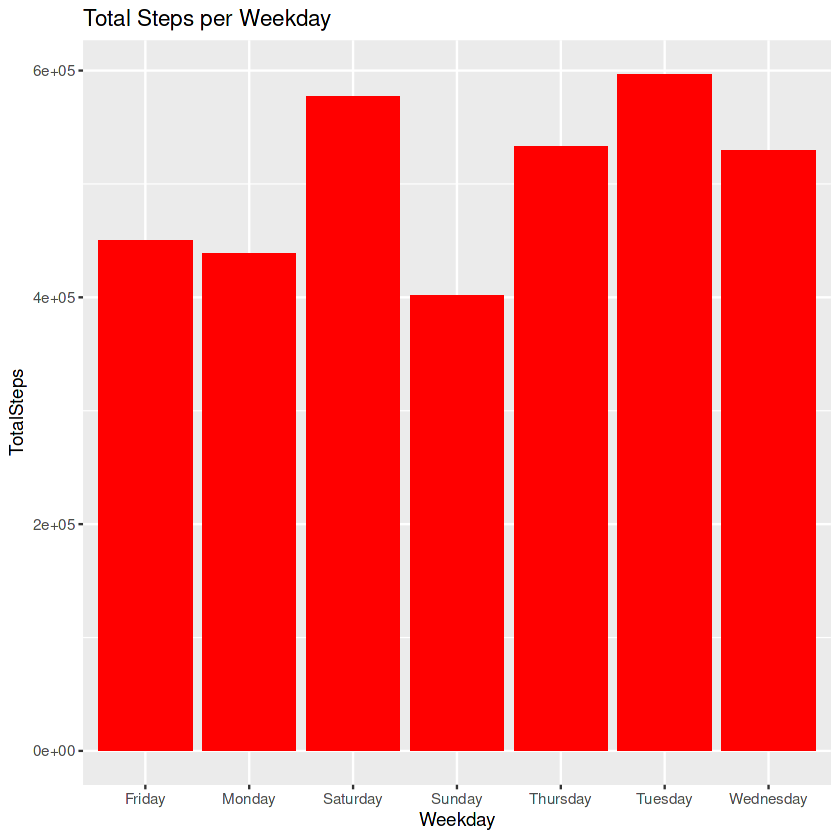

In [11]:
# barchart for comparing Steps for each day
ggplot(merged_data)+
  geom_col(mapping=aes(x=Weekday,y = TotalSteps), fill = 'red') +
  labs(title = 'Total Steps per Weekday')

This barchart looks at the number of steps in relation to the days of the week.
- This barchart should look similar to the one above, but there is one exception: Saturday. Saturday has the second most steps.
    - This should definitely be analyzed further to see why less data is reported on Saturday despite Saturday having a lot of recorded steps. It could be that some data is being lost or people are forgetting to record their activity on some Saturdays.
- Sunday has the least amount of steps.
    - Bellabeat could send additional reminders on this day to help people get in some steps and become more active.

In [12]:
# correlation between sedentary minutes and total minutes asleep
cor(merged_data$SedentaryMinutes,merged_data$TotalMinutesAsleep)

[1] -0.6246438

I checked the correlation for different variables, and the correlation for Sedentary minutes vs. Total minutes asleep was the highest that I found (-0.625). I then ran a scatterplot to show this correlation.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


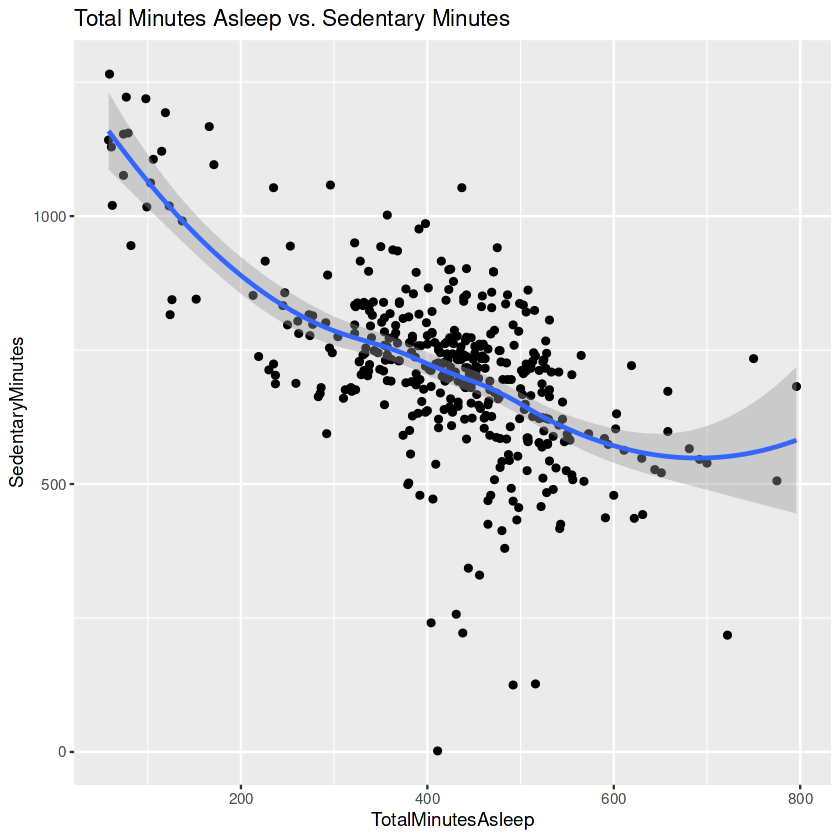

In [13]:
#scatterplot for minutes asleep vs sedentary minutes
ggplot(data = merged_data, aes(x=TotalMinutesAsleep, y=SedentaryMinutes))+
  geom_point() + geom_smooth() + labs(title = 'Total Minutes Asleep vs. Sedentary Minutes')

This scatterplot looks at the relationship between total minutes asleep and sedentary minutes.
- There is a clear negative correlation with less sedentary minutes leading to more minutes asleep. 
    - This does not prove causation as there could be other conflicting factors. However, Bellabeat should use this finding to promote users to be more active as a way of increasing one's sleep time.
- There is a slight uptick at the end, but this is most likely due to outliers.
- More personal information is needed as people of different ages, weight, and other personal characteristics require different amounts of sleep time.


# PHASE 6: Act

### Recommendations for Bellabeat's marketing strategy
1. Educate users about exercising by showing different workout programs/exercises (have a more extensive section for exercises with a shorter duration due to many users performing light activities)

2. Develop a system to help motivate users to exercise more
- Create a rewards program with certain goals to reach (minimum number of steps, completing the suggested exercise for the day, etc.), have more rewards on days with less activity such as Sunday to promote more exercise
- Send a timed notification based on the users' preferences for when they are most free to remind them to exercise

3. Build a community by allowing users to share their progress and comment on people's posts as a way of promoting growth and supporting others